# **Tugas 5 : Keyword Extraction**

**Nama : Achmad Baharuddin Akbar**

**NIM : 210411100001**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Baca file CSV
df = pd.read_csv("/content/drive/MyDrive/PPW-A/report/tugas-ppw/hasil_preprocesing.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,"Menyoal Transplantasi Hati, Prosedur yang Baka...","Selasa, 08 Okt 2024 18:00 WIB",Jakarta - Politikus Demokrat Andi Arief bakal ...,Kesehatan,Jakarta Politikus Demokrat Andi Arief bakal m...,jakarta politikus demokrat andi arief bakal m...,"['jakarta', 'politikus', 'demokrat', 'andi', '...",jakarta politikus demokrat andi arief menjalan...
1,PPDS FK Unsrat-RS Kandou Disetop terkait Bully...,"Selasa, 08 Okt 2024 17:01 WIB",Jakarta - Kementerian Kesehatan RI (Kemenkes) ...,Kesehatan,Jakarta Kementerian Kesehatan RI Kemenkes men...,jakarta kementerian kesehatan ri kemenkes men...,"['jakarta', 'kementerian', 'kesehatan', 'ri', ...",jakarta kementerian kesehatan ri kemenkes meng...
2,"7 Bumbu Dapur yang Bisa Bantu BB Cepat Turun, ...","Selasa, 08 Okt 2024 16:12 WIB","Jakarta - Demi bisa menurunkan berat badan, me...",Kesehatan,Jakarta Demi bisa menurunkan berat badan memb...,jakarta demi bisa menurunkan berat badan memb...,"['jakarta', 'demi', 'bisa', 'menurunkan', 'ber...",jakarta menurunkan berat badan membatasi asupa...
3,"Pungli di PPDS FK Unsrat Disebut Puluhan Juta,...","Selasa, 08 Okt 2024 15:14 WIB",Jakarta - Kementerian Kesehatan RI memberhenti...,Kesehatan,Jakarta Kementerian Kesehatan RI memberhentik...,jakarta kementerian kesehatan ri memberhentik...,"['jakarta', 'kementerian', 'kesehatan', 'ri', ...",jakarta kementerian kesehatan ri memberhentika...
4,Lagi! Kemenkes Bekukan PPDS FK Unsrat-RS Kando...,"Selasa, 08 Okt 2024 14:35 WIB",Jakarta - Kementerian Kesehatan RI menyetop se...,Kesehatan,Jakarta Kementerian Kesehatan RI menyetop sem...,jakarta kementerian kesehatan ri menyetop sem...,"['jakarta', 'kementerian', 'kesehatan', 'ri', ...",jakarta kementerian kesehatan ri menyetop kegi...


In [ ]:
# mengambil satu sample berita
sample_berita = df['Filtering/stopword removal'].iloc[4]

sample_berita_list = [sample_berita]
print(sample_berita)

jakarta kementerian kesehatan ri menyetop kegiatan prodi ilmu penyakit fakultas kedokteran universitas sam ratulangi unsrat rsup prof dr dr r d kandou buntut temuan bullying perundungan pertimbangan pemberhantian fk unsrat pemungutan uang biaya pendidikan perundungan peserta ppds program pendidikan dokter spesialis senior junior permintaan pembayaran pungutan liar ppds senior penyakit ppds junior calon ppds penyakit direktur pelayanan kesehatan kemenkes ri azhar jaya surat instruksi dirilis oktober surat dikonfirmasi juru bicara kemenkes ri mohammad syahril iya kasusnya undip ya memberlakukan ruang perbaikan fk terkait detikcom selasa kemenkes ri peneguran memutuskan penghentian prodi ilmu penyakit fk unsrat perundungan dilaporkan berlanjut kejadian perundungan peringatan kementerian kesehatan kejadian perundungan bentuk ancaman kekerasan verbal non verbal ppds junior sambung azhar bullying berlanjut azhar menandakan normalisasi perundungan lingkup fk terkait pemahaman ppds senior dpjp

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,ancaman,azhar,bentuk,berlanjut,biaya,bicara,bullying,buntut,calon,detikcom,...,syahril,temuan,terkait,uang,undip,universitas,unsrat,upaya,verbal,ya
0,0.041345,0.124035,0.041345,0.08269,0.041345,0.041345,0.08269,0.041345,0.041345,0.041345,...,0.041345,0.041345,0.124035,0.041345,0.041345,0.08269,0.248069,0.041345,0.08269,0.041345


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.03 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,ancaman,azhar,bentuk,berlanjut,biaya,bicara,bullying,buntut,calon,detikcom,...,syahril,temuan,terkait,uang,undip,universitas,unsrat,upaya,verbal,ya
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

           Node  Degree Centrality
0       ancaman                1.0
79      program                1.0
77        prodi                1.0
76    preventif                1.0
75         ppds                1.0
..          ...                ...
32     kegiatan                1.0
31   kedokteran                1.0
30     kasusnya                1.0
29       kandou                1.0
105          ya                1.0

[106 rows x 2 columns]


In [ ]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)


Top 10 fitur berdasarkan degree centrality:
['ancaman', 'program', 'prodi', 'preventif', 'ppds', 'peserta', 'perundungan', 'pertimbangan', 'permintaan', 'perjanjian']

DataFrame asli dengan semua fitur (tanpa menghapus):
   ancaman  azhar  bentuk  berlanjut  biaya  bicara  bullying  buntut  calon  \
0        1      1       1          1      1       1         1       1      1   

   detikcom  ...  syahril  temuan  terkait  uang  undip  universitas  unsrat  \
0         1  ...        1       1        1     1      1            1       1   

   upaya  verbal  ya  
0      1       1   1  

[1 rows x 106 columns]


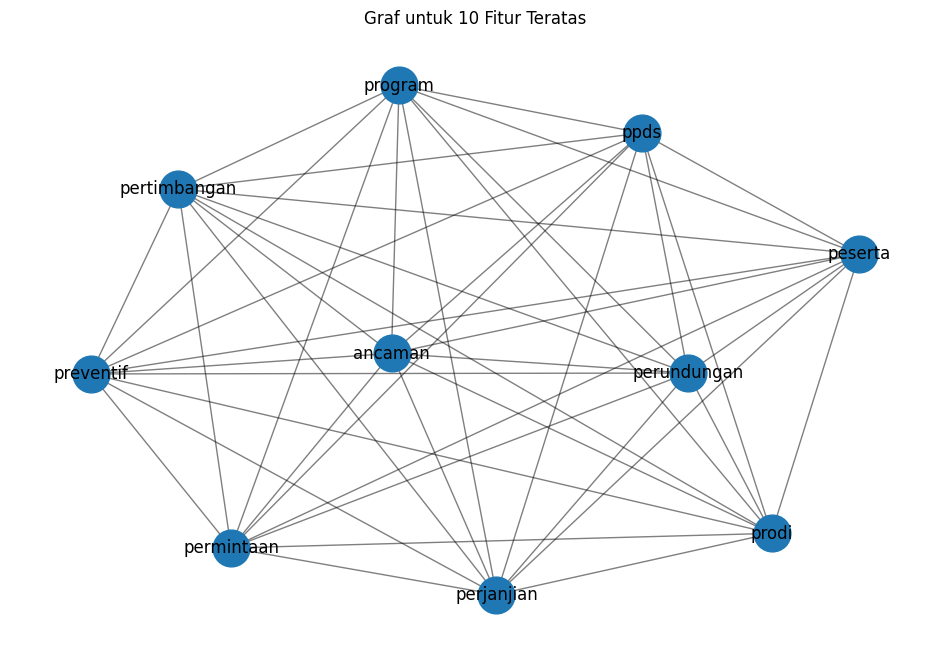

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():  # Memeriksa apakah dataframe df_tfidf_1berita sudah ada
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):  # Pastikan dataframe ini ada dan ukurannya benar
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

           Node  Degree Centrality  Closeness Centrality  \
0       ancaman                1.0                   1.0   
1       program                1.0                   1.0   
2         prodi                1.0                   1.0   
3     preventif                1.0                   1.0   
4          ppds                1.0                   1.0   
5       peserta                1.0                   1.0   
6   perundungan                1.0                   1.0   
7  pertimbangan                1.0                   1.0   
8    permintaan                1.0                   1.0   
9    perjanjian                1.0                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


In [ ]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: ancaman
